# Praca domowa 5

Najpierw wczytajmy dane

In [41]:
import pandas as pd

In [42]:
filepath1 = "data/Comments.csv.gz"
filepath2 = "data/Posts.csv.gz"
filepath3 = "data/Users.csv.gz"

Comments = pd.read_csv(filepath1)
Posts = pd.read_csv(filepath2)
Users = pd.read_csv(filepath3)

## Zadanie 1

<AxesSubplot:>

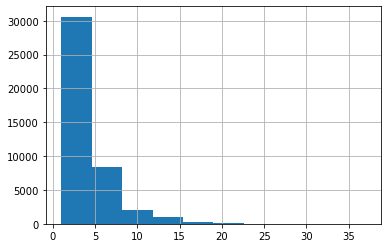

In [43]:
#Posts['CommentCount'].hist() - jeżeli, intersują nasz też post bez żadnych odpowidzi to ten histogram będzie lepszy 

Comments.groupby('PostId').count().reset_index()['Id'].hist()

## Zadanie 2

In [44]:
Posts[['OwnerUserId', 'ViewCount']].groupby('OwnerUserId').sum()\
    .merge(Users[['AccountId', 'DisplayName']],  left_on='OwnerUserId', right_on = 'AccountId' )\
    .sort_values(by='ViewCount', ascending=False).iloc[0]



ViewCount      1.4611e+06
AccountId             101
DisplayName         hitec
Name: 9, dtype: object

Zatem użytkownikiem z największą ilością wyświetlonych postów jest 'hitec'.

## Zadanie 3

In [45]:
odpowiedzi = Posts[Posts['PostTypeId'] == 2]

odpowiedzi.merge(Posts, left_on='Id', right_on = 'AcceptedAnswerId', suffixes = ('_odpowiedzi', '_pytania'))\
    .OwnerUserId_odpowiedzi.value_counts().head(2)

Users[Users['Id'] == 1893]

,AccountId,Age,CreationDate,DisplayName,DownVotes,Id,LastAccessDate,Location,Reputation,UpVotes,Views
1789,76198.0,NaN,2012-02-12T22:24:02.820,jpatokal,117,1893,2017-08-27T03:15:31.483,NaN,95843,6489,3598


Zatem użytkownikiem, który ma drugą największą liczbę odpowiedzi jest 'jpatokal'.

## Zadanie 4

In [46]:
a = Posts[Posts['PostTypeId']==2].groupby('ParentId').max('Score').reset_index()[['ParentId', 'Score']]
b = Posts[Posts['PostTypeId'] == 2].merge(Posts, left_on='Id', right_on = 'AcceptedAnswerId', \
                                          suffixes = ('_odpowiedzi', '_pytania'))[['Id_pytania', 'Score_odpowiedzi']]

test = a.merge(b, left_on='ParentId', right_on='Id_pytania')
len(test[test['Score_odpowiedzi'] < test['Score']].Id_pytania)

1039

Zatem odsetek postów dla których odpowiedź zaakceptowana ma niższy wynik niż odpowiedź o najwyższym wyniku wynosi około $9.044 \, \%$ (jako całą populacje bierzemy tylko te posty, które zawierają zaakceptowaną odpowiedź).